In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [0]:
path="/content/drive/My Drive/database_folder/iitdelhi/label_delhi.csv"

In [0]:
data=pd.read_csv(path)

In [0]:
data

,serial,username,text,score,label
0,0,DefTechAshwin,shanti,0,Neu
1,1,TheYashAgarwal,salute indian army sacrifice remember serv...,2,Pos
2,2,amehtaboy,bsf jawan sanjay sadhu martyred assam,0,Neu
3,3,Uttarakhandpor1,lance naik sandeep thapa martyred ceasefire v...,-1,Neg
4,4,Clensta_India,fight enemies germs easily products fre...,-1,Neg
...,...,...,...,...,...
7664,7664,trueindian1978,hey man don report cruelty islamist intru...,-1,Neg
7665,7665,Zabiulla_N,alvida dilli radisson blu marin...,0,Neu
7666,7666,sidagarwal,shadows taken lots images qutub minar airp...,0,Neu
7667,7667,Expedition2Inc,guests david mrs matranga gala time delhi ...,1,Pos


In [0]:

data.label.value_counts()

Neu    4872
Pos    2237
Neg     560
Name: label, dtype: int64

In [0]:
# for text preprcoessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re


In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
# keras library
from keras.utils import to_categorical
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Dropout, Embedding, LSTM, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
tf.random.set_seed(5)

In [0]:
lemmatizer=WordNetLemmatizer()

In [0]:
# data preprocessing
def preprocess(data):
  review=[]
  for cmt  in tqdm(data['text']):
    clean_cmt=re.sub("[^a-zA-Z]", " ",str(cmt))
    words=word_tokenize(clean_cmt.lower())
    lemma_word=[lemmatizer.lemmatize(word) for word in words]
    review.append(lemma_word)
  return(review)

In [0]:
clean_data=preprocess(data)

100%|██████████| 7669/7669 [00:02<00:00, 2782.10it/s]


In [0]:
data


,serial,username,text,score,label
0,0,DefTechAshwin,shanti,0,Neu
1,1,TheYashAgarwal,salute indian army sacrifice remember serv...,2,Pos
2,2,amehtaboy,bsf jawan sanjay sadhu martyred assam,0,Neu
3,3,Uttarakhandpor1,lance naik sandeep thapa martyred ceasefire v...,-1,Neg
4,4,Clensta_India,fight enemies germs easily products fre...,-1,Neg
...,...,...,...,...,...
7664,7664,trueindian1978,hey man don report cruelty islamist intru...,-1,Neg
7665,7665,Zabiulla_N,alvida dilli radisson blu marin...,0,Neu
7666,7666,sidagarwal,shadows taken lots images qutub minar airp...,0,Neu
7667,7667,Expedition2Inc,guests david mrs matranga gala time delhi ...,1,Pos


In [0]:
clean_data

In [0]:
k=data['label']
sentiment=k

In [0]:
sentiment

0       Neu
1       Pos
2       Neu
3       Neg
4       Neg
       ... 
7664    Neg
7665    Neu
7666    Neu
7667    Pos
7668    Neu
Name: label, Length: 7669, dtype: object

In [0]:

for i in range(len(sentiment)):
  if sentiment[i]=='Pos':
    sentiment[i]=0
  elif sentiment[i]=='Neg':
      sentiment[i]=1
  elif sentiment[i]=='Neu':
    sentiment[i]=2   



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
# we need to convert sentiment into  one hot encoder
sentiment

0       2
1       0
2       2
3       1
4       1
       ..
7664    1
7665    2
7666    2
7667    0
7668    2
Name: label, Length: 7669, dtype: object

In [0]:
y=to_categorical(sentiment)

In [0]:
y.shape[1]

3

In [0]:
y

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [0]:
data

,serial,username,text,score,label
0,0,DefTechAshwin,shanti,0,2
1,1,TheYashAgarwal,salute indian army sacrifice remember serv...,2,0
2,2,amehtaboy,bsf jawan sanjay sadhu martyred assam,0,2
3,3,Uttarakhandpor1,lance naik sandeep thapa martyred ceasefire v...,-1,1
4,4,Clensta_India,fight enemies germs easily products fre...,-1,1
...,...,...,...,...,...
7664,7664,trueindian1978,hey man don report cruelty islamist intru...,-1,1
7665,7665,Zabiulla_N,alvida dilli radisson blu marin...,0,2
7666,7666,sidagarwal,shadows taken lots images qutub minar airp...,0,2
7667,7667,Expedition2Inc,guests david mrs matranga gala time delhi ...,1,0


splitting dataset to train test and valdation

In [0]:
x_train,x_test,y_train,y_test=train_test_split(clean_data,y,test_size=.05,stratify=y)

In [0]:
print(len(x_train),len(x_test))

7285 384


In [0]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.2,stratify=y_train)

In [0]:
print(len(x_train),len(x_val))

5828 1457


In [0]:
x_train

In [0]:
clean_data

In [0]:
unique_word=set()

max_len=0;

for i in tqdm(clean_data):
  unique_word.update(i)
  if len(i)>max_len:
    max_len=len(i)


100%|██████████| 7669/7669 [00:00<00:00, 598584.17it/s]


In [0]:
len(unique_word)

8802

Tokenization

In [0]:
tokenizer=Tokenizer(num_words=len(list(unique_word)))
tokenizer.fit_on_texts(list(clean_data))

In [0]:
def text_to_seq(text,tokenizer):
  return tokenizer.texts_to_sequences(text)

def pad_sequence(seq,max_len):
  return sequence.pad_sequences(seq,max_len)

In [0]:
x_train=text_to_seq(x_train,tokenizer)
x_test=text_to_seq(x_test,tokenizer)
x_val=text_to_seq(x_val,tokenizer)

In [0]:
x_train[0]

[567, 1773]

In [0]:
# Padding
x_train=pad_sequence(x_train,max_len)
x_test=pad_sequence(x_test,max_len)
x_val=pad_sequence(x_val,max_len)

In [0]:
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,  567, 1773],
      dtype=int32)

early stopping

In [0]:
back_call=[EarlyStopping(monitor='val_acc',patience=5,min_delta=.001,mode="max"),
           ModelCheckpoint(filepath="delhi_model.h5",save_best_only=True,save_weights_only=False)]

In [0]:
# pip install keras==2.3.1

In [0]:
# pip install tensorflow==2.1.0

In [0]:
num_classes=y.shape[1]
num_classes

3

In [0]:
model = Sequential(name="Model #1")
model.add(Embedding(len(list(unique_word)), 256, input_length=max_len, name="Embedding"))
model.add(LSTM(128, dropout=0.5, recurrent_dropout=0.5, return_sequences=True, name="LSTM1"))
model.add(LSTM(64, dropout=0.5, recurrent_dropout=0.5, return_sequences=False, name="LSTM2"))
model.add(Dense(100, activation="relu", name="Dense1"))
model.add(Dropout(0.5, name="Dropout1"))
model.add(Dense(num_classes, activation="softmax", name="Output"))
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.005), metrics=['accuracy'])
model.summary()

Model: "Model #1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 44, 256)           2253312   
_________________________________________________________________
LSTM1 (LSTM)                 (None, 44, 128)           197120    
_________________________________________________________________
LSTM2 (LSTM)                 (None, 64)                49408     
_________________________________________________________________
Dense1 (Dense)               (None, 100)               6500      
_________________________________________________________________
Dropout1 (Dropout)           (None, 100)               0         
_________________________________________________________________
Output (Dense)               (None, 3)                 303       
Total params: 2,506,643
Trainable params: 2,506,643
Non-trainable params: 0
________________________________________________

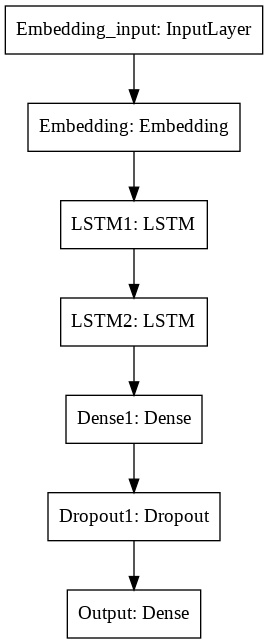

In [0]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=256, verbose=1, callbacks=back_call)

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 5828 samples, validate on 1457 samples
Epoch 1/5
5828/5828 [==============================] - 17s 3ms/step - loss: 0.7246 - accuracy: 0.6889 - val_loss: 0.5456 - val_accuracy: 0.7694
Epoch 2/5


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


5828/5828 [==============================] - 16s 3ms/step - loss: 0.4131 - accuracy: 0.8581 - val_loss: 0.4452 - val_accuracy: 0.8408
Epoch 3/5
5828/5828 [==============================] - 16s 3ms/step - loss: 0.2470 - accuracy: 0.9111 - val_loss: 0.4646 - val_accuracy: 0.8751
Epoch 4/5
5828/5828 [==============================] - 16s 3ms/step - loss: 0.1232 - accuracy: 0.9621 - val_loss: 0.4402 - val_accuracy: 0.8765
Epoch 5/5
5828/5828 [==============================] - 16s 3ms/step - loss: 0.0735 - accuracy: 0.9775 - val_loss: 0.4975 - val_accuracy: 0.8861


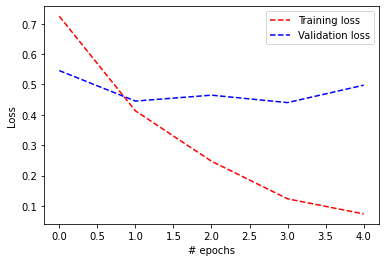

In [0]:
plt.plot(history.history['loss'], 'r--')
plt.plot(history.history['val_loss'], 'b--')
plt.legend(['Training loss', 'Validation loss'])
plt.xlabel("# epochs")
plt.ylabel("Loss")
plt.show()

In [0]:
from keras.models import load_model
model=load_model('/content/delhi_model.h5')

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [0]:
y_pred=model.predict_classes(x_test)


In [0]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0,
       0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 0, 0, 2, 0, 1, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 2, 2,
       2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 0,
       2, 2, 0, 2, 1, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2,

In [0]:
# def custom_test_case(sentence):
#   clean_phrase=re.sub("[^a-zA-Z]", " ", sentence)
#   words = word_tokenize(clean_phrase.lower())
#   lemma_words = [lemmatizer.lemmatize(word) for word in words]
#   # print(lemma_words)
#   tt=text_to_seq(lemma_words,tokenizer)
#   # print(tt)
#   tt=sequence.pad_sequences(tt,max_len)
#   # print(tt)
#   y_temp=model.predict_classes(tt)
#   return y_temp  






In [0]:
# ck='this is a beautiful place everyone should visit here'
# z=custom_test_case(ck)

In [0]:
# z
# print(len(ck))